# 太阳能电池的特性测量-数据处理

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pylab import mpl
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

## 表1

In [3]:
data1=pd.read_csv("太阳能电池.csv")
data1

,45mA_I,45mA_U,35mA_I,35mA_U,25mA_I,25mA_U,15mA_I,15mA_U
0,45.0,0.22,35.0,0.17,25.0,0.13,14.9,0.07
1,44.0,1.70,34.9,0.53,24.7,0.30,14.8,0.44
2,42.6,1.82,34.6,1.06,24.5,0.97,14.7,0.76
3,40.5,1.87,34.5,1.60,23.3,1.60,14.6,0.98
4,38.2,1.90,33.3,1.76,23.6,1.72,14.6,1.17
5,36.5,1.92,32.4,1.80,22.4,1.80,14.6,1.38
6,34.1,1.94,30.4,1.86,21.7,1.83,14.1,1.61
7,32.1,1.96,29.0,1.88,20.0,1.87,13.7,1.66
8,30.1,1.97,27.3,1.91,19.1,1.89,12.6,1.76
9,28.4,1.98,25.9,1.92,18.1,1.90,11.6,1.81


## 表2

In [9]:
data2=pd.DataFrame({"45mA_P":data1["45mA_U"]*data1["45mA_I"],"45mA_R":data1["45mA_U"]/(data1["45mA_I"]*0.001),
                    "35mA_P":data1["35mA_U"]*data1["35mA_I"],"35mA_R":data1["35mA_U"]/(data1["35mA_I"]*0.001),
                   "25mA_P":data1["25mA_U"]*data1["25mA_I"],"25mA_R":data1["25mA_U"]/(data1["25mA_I"]*0.001),
                   "15mA_P":data1["15mA_U"]*data1["15mA_I"],"15mA_R":data1["15mA_U"]/(data1["15mA_I"]*0.001)})
data2["15mA_P"]

1    6.512
Name: 15mA_P, dtype: float64

## U-I曲线与P-R曲线

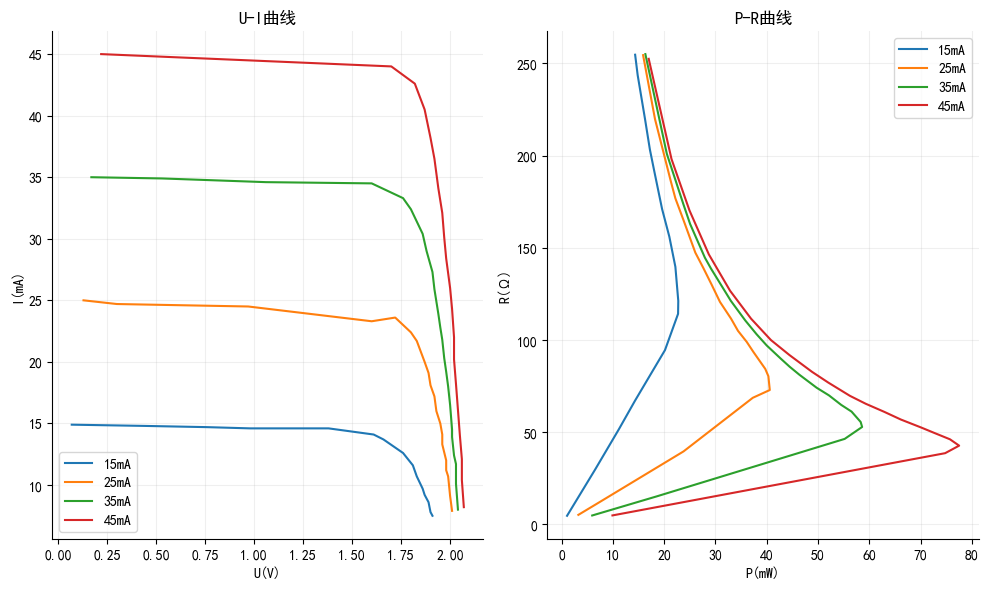

In [4]:
fig, axs = plt.subplots(1,2,figsize=(10, 6))

axs[0].set_title('U-I曲线')

for i  in range(1,5):
    axs[0].plot(data1[f"{i}5mA_U"],data1[f"{i}5mA_I"])

axs[0].set_xlabel('U(V)')
axs[0].set_ylabel('I(mA)')
axs[0].legend([f'{i}5mA' for i in range(1,5)])
axs[0].spines[["top", "right"]].set_visible(False)

axs[1].set_title('P-R曲线')
for i  in range(1,5):
    axs[1].plot(data2[f"{i}5mA_P"],data2[f"{i}5mA_R"])

axs[1].set_xlabel('P(mW)')
axs[1].set_ylabel('R(Ω)')
axs[1].legend([f'{i}5mA' for i in range(1,5)])
axs[1].spines[["top", "right"]].set_visible(False)

axs[0].grid(alpha=0.2)
axs[1].grid(alpha=0.2)

plt.tight_layout()

## 表3

In [5]:
U_0=np.array([2.10,2.07,2.04,1.99])
I_s=np.array([45.0,35.0,25.0,15.0])
R_i=U_0/(I_s*0.001)
R_i

array([ 46.66666667,  59.14285714,  81.6       , 132.66666667])

In [6]:
R_max=[data2[f"{i}5mA_R"].iloc[data2[f"{i}5mA_P"].idxmax()] for i in range(1,5)][::-1]
R_max

[42.72300469483568, 52.85285285285286, 72.88135593220338, 121.16788321167883]

In [7]:
R_max/R_i

array([0.91549296, 0.89364727, 0.89315387, 0.91332575])

## 表4

In [8]:
P_max=[data2[f"{i}5mA_P"].iloc[data2[f"{i}5mA_P"].idxmax()] for i in range(1,5)][::-1]
P_max

[77.53200000000001, 58.608, 40.592, 22.741999999999997]

In [9]:
a=U_0*I_s
a

array([94.5 , 72.45, 51.  , 29.85])

In [10]:
F=P_max/a
F

array([0.82044444, 0.8089441 , 0.79592157, 0.76187605])

## 其他

In [11]:
F_mean=np.mean(F)
F_mean

0.7967965398379875

In [12]:
S_F=np.sqrt(np.sum((F-F_mean)**2)/(3*4))
S_F

0.012672124909439003

In [13]:
E=S_F/F_mean*100
E

1.5903840285269846